In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# 1. Last inn data
df = pd.read_csv("../data/data.csv")

=== Beskrivende statistikk ===

age:
  Mean: 34.95
  Median: 35.00
  Std: 10.58


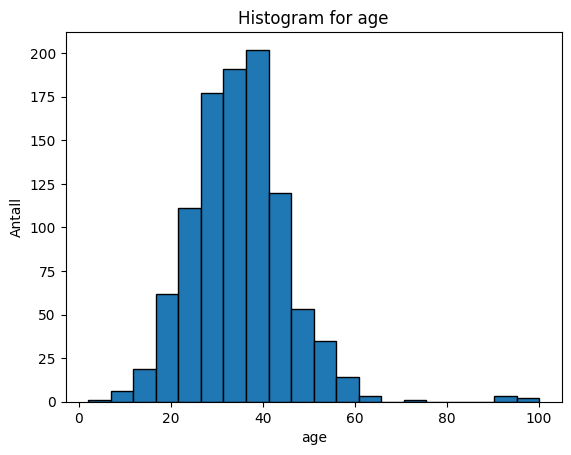


salary:
  Mean: 88710.33
  Median: 87981.34
  Std: 22128.39


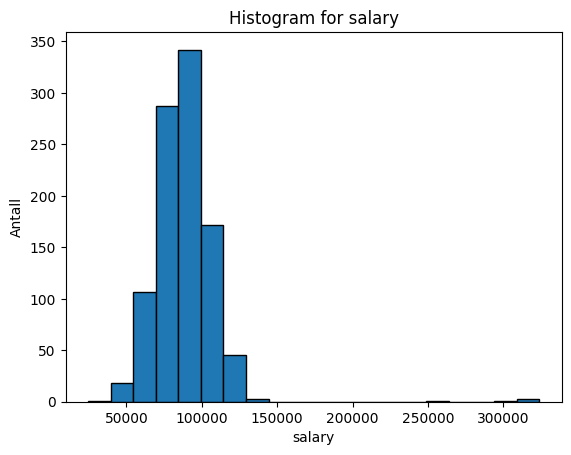

In [3]:
# ---- 1. Beskrivende statistikk og uteliggere ----
print("=== Beskrivende statistikk ===")
for col in ["age", "salary"]:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")

    # Histogram
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Antall")
    plt.show()

In [4]:
print("\n=== Korrelasjoner ===")
# Bruk bare numeriske kolonner (dropp 'constant_feature' som er meningsløs)
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=["constant_feature"]).columns
corr_matrix = df[numeric_cols].corr()

# Hent topp-3 korrelasjoner
corr_pairs = (
    corr_matrix.unstack()
    .sort_values(key=lambda x: abs(x), ascending=False)
    .drop_duplicates()
)


=== Korrelasjoner ===


In [5]:
# Fjern selv-korrelasjoner
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top3 = corr_pairs[:3]
print(top3)

salary     education_years    0.226206
shoe_size  age                0.083974
salary     shoe_size          0.075895
dtype: float64



=== Gjennomsnittlig lønn per avdeling ===
department
HR             91791.517664
Finance        88840.663380
Engineering    88462.524284
Sales          88199.209779
Name: salary, dtype: float64


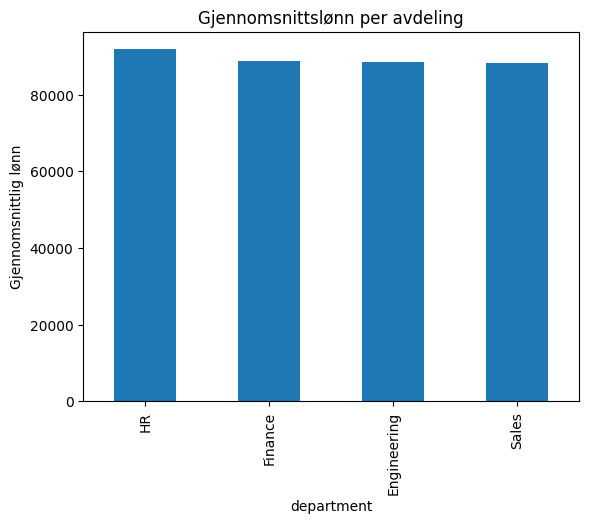

In [8]:

print("\n=== Gjennomsnittlig lønn per avdeling ===")
dept_salary = df.groupby("department")["salary"].mean().sort_values(ascending=False)
print(dept_salary)

dept_salary.plot(kind="bar")
plt.title("Gjennomsnittslønn per avdeling")
plt.ylabel("Gjennomsnittlig lønn")
plt.show()

In [6]:
import pandas as pd

# Samlet korrelasjon
overall_corr = df["age"].corr(df["salary"])
print(f"Samlet korrelasjon (hele datasettet): {overall_corr:.3f}")

# Korrelasjon per department
print("\nKorrelasjon per avdeling:")
for dept, group in df.groupby("department"):
    if len(group) > 2:  # må ha nok data
        corr = group["age"].corr(group["salary"])
        print(f"  {dept:15}: {corr:.3f}")

# Korrelasjon per favorite_color
print("\nKorrelasjon per favorittfarge:")
for color, group in df.groupby("favorite_color"):
    if len(group) > 2:
        corr = group["age"].corr(group["salary"])
        print(f"  {color:15}: {corr:.3f}")


Samlet korrelasjon (hele datasettet): 0.006

Korrelasjon per avdeling:
  Engineering    : -0.115
  Finance        : 0.095
  HR             : 0.139
  Sales          : 0.019

Korrelasjon per favorittfarge:
  blue           : -0.017
  green          : 0.071
  red            : -0.030


In [7]:
features = ["age", "education_years", "shoe_size"]
df=df.dropna()
X = df[features]
y = df["salary"]

model = LinearRegression()
model.fit(X, y)

print("Koefisienter:")
for f, coef in zip(features, model.coef_):
    print(f"  {f}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# Prediksjonseksempel
y_pred = model.predict(X)
print("\nFørste 5 prediksjoner vs faktiske verdier:")
print(pd.DataFrame({"Pred": y_pred[:5], "Faktisk": y[:5]}))

Koefisienter:
  age: -3.696
  education_years: 2445.463
  shoe_size: 734.666
Intercept: 28264.619

Første 5 prediksjoner vs faktiske verdier:
           Pred        Faktisk
0  86641.994684  104149.582987
1  93724.782102  103639.346797
2  82024.500760   79898.402214
3  85910.509372   75867.274392
4  92077.929648  102361.234472
